<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import folium

In [45]:
!pip install folium

    100% |████████████████████████████████| 92kB 3.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /Users/michaele/Library/Caches/pip/wheels/8d/4f/13/3465cf330820b49ad39f949f0af17d0cd95ef1b0bd86362748
Successfully built folium


In [9]:
phone_data = pd.read_csv('./datasets/metadata.csv')

In [10]:
phone_data.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [22]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
dtypes: float64(2), object(5)
memory usage: 573.0+ KB


In [24]:
phone_data['Comm Timedate String'] = pd.to_datetime(phone_data['Comm Timedate String'])

In [14]:
phone_data['Comm Type'].value_counts()

Internet    9102
Phone        717
SMS          657
Name: Comm Type, dtype: int64

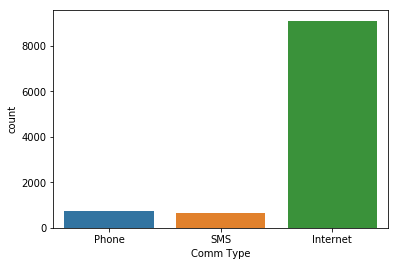

In [17]:
sns.countplot(phone_data['Comm Type'])

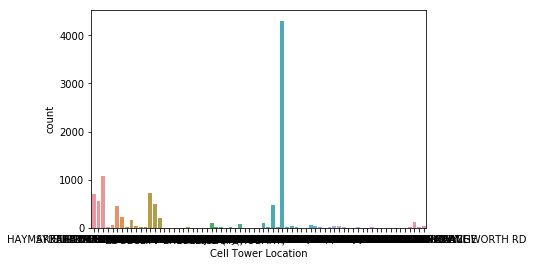

In [77]:
sns.countplot(phone_data['Cell Tower Location'])

In [ ]:
frequent_callers

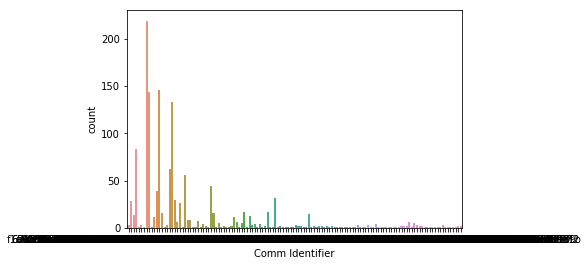

In [59]:
sns.countplot(phone_data['Comm Identifier'])

In [79]:
frequent_callers = phone_data[phone_data['Comm Identifier'].count()>=50]

KeyError: True

In [72]:
#Creating additional columns for hour, day of week, month and year based on timestamp
phone_data['day_of_week'] = phone_data['Comm Timedate String'].dt.dayofweek
phone_data['month'] = phone_data['Comm Timedate String'].dt.month
phone_data['year'] = phone_data['Comm Timedate String'].dt.year
phone_data['hour'] = phone_data['Comm Timedate String'].dt.hour

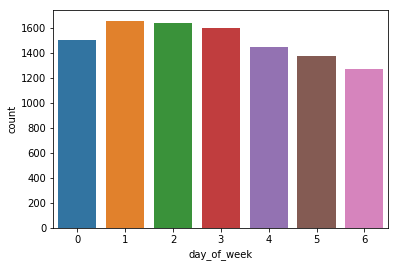

In [33]:
sns.countplot(phone_data['day_of_week'])

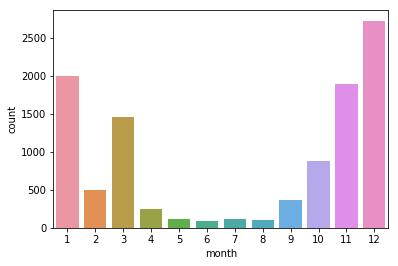

In [38]:
sns.countplot(phone_data['month'])

In [40]:
comm_type = phone_data.groupby('Comm Type')

In [75]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 11 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null datetime64[ns]
Comm Type               10476 non-null object
Latitude                10476 non-null int64
Longitude               10476 non-null int64
day_of_week             10476 non-null int64
month                   10476 non-null int64
year                    10476 non-null int64
hour                    10476 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 900.4+ KB


In [111]:
phone_data['Cell Tower Location'].value_counts().head(30)

BALGOWLAH HAYES ST                          4301
CHIPPENDALE                                 1084
SUNDERLAND ST                                723
REDFERN TE                                   712
HAYMARKET #                                  563
BRICKWORKS                                   501
HARBORD 22 WAINE ST                          465
FAIRLIGHT 137 SYDNEY RD                      454
MANLY #                                      231
NEW TOWN                                     197
CHINATOWN                                    161
BEECHWORTH                                   112
BALGOWLAH VILLAGE SHOPPING CENTRE IBC        106
MANLY SOUTH STEYNE                            92
BROADWAY OTC                                  85
MASCOT INTERNATIONAL AIRPORT TERMINAL T1      65
71 MACQUARIE ST                               49
SURRY HILLS 418A ELIZABETH ST                 45
MANLY NTH STEYNE                              40
MASCOT M5 MOTORWAY EMERGENCY STAIRS           33
BALGOWLAH TE        

In [100]:
balgowlah = phone_data[phone_data['Cell Tower Location'] == 'BALGOWLAH HAYES ST']

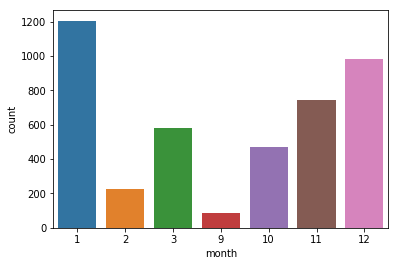

In [104]:
sns.countplot(balgowlah['month'])

In [106]:
CHIPPENDALE = phone_data[phone_data['Cell Tower Location'] == 'CHIPPENDALE']

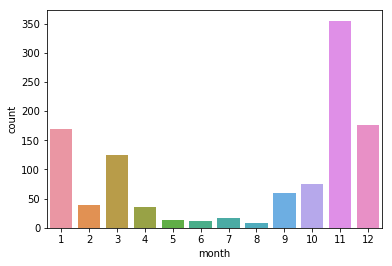

In [107]:
sns.countplot(CHIPPENDALE['month'])

In [108]:
SUNDERLAND = phone_data[phone_data['Cell Tower Location'] == 'SUNDERLAND ST']

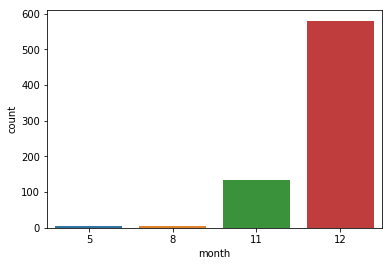

In [109]:
sns.countplot(SUNDERLAND['month'])

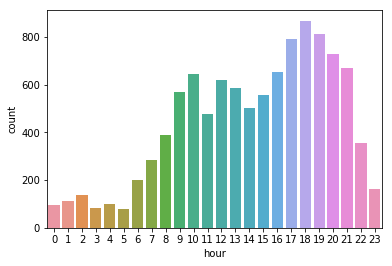

In [76]:
sns.countplot(phone_data['hour'])

In [90]:
phone_data['Latitude'].value_counts()

-33    8829
-42    1476
-36     168
-37       3
Name: Latitude, dtype: int64

In [89]:
phone_data['Longitude'].value_counts()

151    8829
147    1476
146     168
144       3
Name: Longitude, dtype: int64

In [93]:
phone_data[(phone_data['Latitude']==-42) & (phone_data['Longitude']== 147)]['Cell Tower Location'].value_counts()

SUNDERLAND ST            723
BRICKWORKS               501
NEW TOWN                 197
HOBART AIRPORT            17
COLLINS ST (HOBART)       15
NORTH HOBART 1800          7
POLICE HEADQUARTERS        4
MAQUARIE ST                4
LUTANA                     4
MOUNT RUMNEY               3
GRAND CHANCELLOR 1800      1
Name: Cell Tower Location, dtype: int64

In [119]:
taz = phone_data[(phone_data['Latitude']==-42) & (phone_data['Longitude']== 147)]

In [120]:
taz.head(1)

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,day_of_week,month,year,hour
166,505012950048F,HOBART AIRPORT,12e3d1b0c95aa32b6890c4455918dfc10e09fb51,2014-05-02 20:44:00,Phone,-42,147,4,5,2014,20


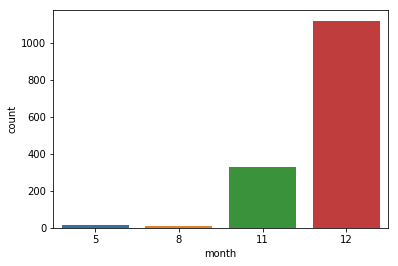

In [121]:
sns.countplot(taz['month'])

In [ ]:
phone_data[(phone_data['Latitude']==-42) & (phone_data['Longitude']== 147)]['Cell Tower Location'].value_counts()

In [ ]:
phone_data['lat_long'] = 

## Location of Calls using Folium

In [53]:
phone_data['Latitude'] = phone_data['Latitude'].astype(int)
phone_data['Longitude'] = phone_data['Longitude'].astype(int)

In [122]:
folium.Map([,147], zoom_start= 15)

In [112]:
folium.Map([-36,146])

In [ ]:
phone_data[]